In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import hamming_loss
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = pd.read_csv('MI.data',na_values='?')
column_names = ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
df1.columns=column_names

for col in df1.columns:
  if(df1[col].isin([0,1,2,3,4,5,np.nan]).all()):
    df1[col]=df1[col].fillna(df1[col].mode()[0])
  else:
    df1[col]=df1[col].fillna(df1[col].median())

print(df1['IBS_NASL'].isnull().sum())

print(df1['IBS_NASL'])

imputer = KNNImputer(n_neighbors=5)
df=imputer.fit_transform(df1)

x=df1.iloc[:,2:75]
y=df1.iloc[:,113]


y1=df1.iloc[:,112:123]

yo=df1.iloc[:,123]


smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, yo)

features=['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'ZSN_A',
       'nr_04', 'endocr_02', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03',
       'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_SH_POST',
       'MP_TP_POST', 'SVT_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im',
       'ritm_ecg_p_01', 'ritm_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_05',
       'n_r_ecg_p_06']




x_train, x_test, y_train, y_test = train_test_split(x_resampled[features], y_resampled, test_size=0.2, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, 8)



0
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1694    0.0
1695    0.0
1696    0.0
1697    0.0
1698    0.0
Name: IBS_NASL, Length: 1699, dtype: float64
28


In [ ]:
model = keras.Sequential([
    keras.layers.LSTM(32, input_shape=(28,1), return_sequences=True),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
229/229 [==============================] - 11s 48ms/step - loss: 0.0890 - accuracy: 0.9705 - val_loss: 0.1106 - val_accuracy: 0.9694
Epoch 2/20
229/229 [==============================] - 8s 37ms/step - loss: 0.0744 - accuracy: 0.9761 - val_loss: 0.0796 - val_accuracy: 0.9759
Epoch 3/20
229/229 [==============================] - 8s 33ms/step - loss: 0.0652 - accuracy: 0.9743 - val_loss: 0.0718 - val_accuracy: 0.9770
Epoch 4/20
229/229 [==============================] - 9s 37ms/step - loss: 0.0688 - accuracy: 0.9770 - val_loss: 0.0685 - val_accuracy: 0.9809
Epoch 5/20
229/229 [==============================] - 8s 36ms/step - loss: 0.0824 - accuracy: 0.9705 - val_loss: 0.0659 - val_accuracy: 0.9809
Epoch 6/20
229/229 [==============================] - 7s 33ms/step - loss: 0.0557 - accuracy: 0.9803 - val_loss: 0.0649 - val_accuracy: 0.9792
Epoch 7/20
229/229 [==============================] - 9s 38ms/step - loss: 0.0586 - accuracy: 0.9774 - val_loss: 0.0762 - val_accuracy: 0.976

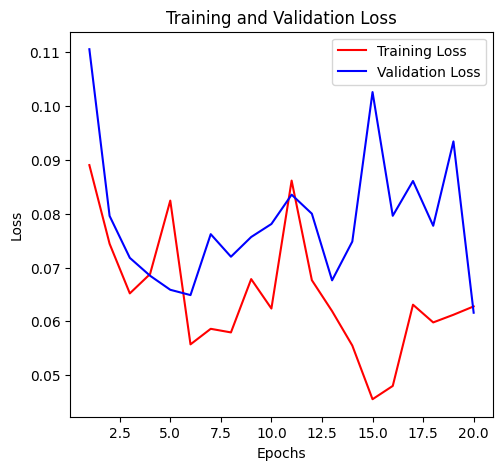

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, 20 + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



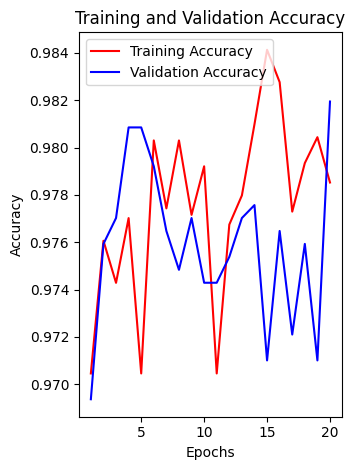

In [ ]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred=model.predict(x_test)

yp=[]

print(y_pred)

for i in range(len(y_pred)):
  mx=max(y_pred[i])
  for j in range(len(y_pred[0])):
    if (y_pred[i][j]==mx):
      yp.append(j)

yt=[]
print(yp)
for i in y_test:
  yt.append(int(i))

print(yt)

acc=accuracy_score(yp,yt)
print(acc)

jacc=jaccard_score(yp,yt,average='macro')
print(jacc)

72/72 [==============================] - 1s 12ms/step
[[8.97361279e-01 5.58327301e-05 2.37682252e-09 ... 3.49433685e-14
  6.51448146e-02 2.43399195e-15]
 [1.23115169e-05 9.99987662e-01 4.92356780e-26 ... 1.71268292e-17
  8.85759729e-11 5.82856288e-08]
 [5.84360860e-05 3.83245935e-11 9.82849138e-21 ... 1.73120765e-15
  3.28675079e-20 9.99941528e-01]
 ...
 [5.05934258e-05 2.37721520e-06 4.80873680e-16 ... 2.65347033e-08
  2.06717132e-08 1.26513329e-13]
 [7.66848700e-07 4.48623323e-05 9.99928713e-01 ... 1.11785725e-14
  2.43221209e-18 3.70757095e-14]
 [1.00000000e+00 7.15527006e-16 1.25243670e-28 ... 2.44161258e-29
  1.61049467e-19 4.08138921e-29]]
[0, 1, 7, 3, 1, 4, 7, 6, 6, 3, 3, 7, 1, 2, 6, 6, 6, 2, 2, 4, 1, 4, 1, 0, 7, 7, 3, 2, 6, 2, 0, 0, 1, 2, 0, 1, 7, 1, 4, 7, 5, 1, 0, 1, 7, 6, 4, 6, 0, 5, 4, 6, 2, 6, 6, 5, 3, 3, 2, 6, 3, 0, 1, 6, 4, 4, 0, 2, 7, 6, 1, 6, 5, 4, 2, 4, 1, 6, 2, 4, 2, 5, 0, 4, 1, 7, 7, 5, 3, 4, 3, 5, 7, 2, 4, 3, 3, 5, 0, 3, 5, 3, 6, 5, 3, 6, 7, 3, 5, 1, 1, 2, 6, 1, 2, 

In [ ]:
model.save('LSTM3.keras')